# Balken

Die analytischen (1D) Balkenbiegeformeln stehen z.B. in [Gross et al., 2014] oder [Landau, Lifschitz, 1975]. Im folgenden Beispiel wird ein elastischer Zylinder aus Baustahl, mit einem quadratischen Querschnitt von 0.0001 $m^2$ und einer Länge von 0.1 $m^2$ unter Eigengewicht gebogen.

In [25]:
import numpy as np
import plotly.express as px
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import seaborn as sns
#sns.set()
mpl.rcParams["figure.figsize"] = (20,7)
mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.markersize'] = 15
#sns.set()
farben = sns.color_palette()
plt.style.use('seaborn-darkgrid')
farben = sns.color_palette()

In [26]:
x, f, E, I, l = sym.symbols('x, f, E, I, l', real=True)

In [27]:
u = f/(24*E*I)*(x**4-4*l*x**3+6*l**2*x**2)
u


f*(6*l**2*x**2 - 4*l*x**3 + x**4)/(24*E*I)

In [28]:
u_e = f/(24*E*I)*x**2*(x-l)**2
u_e

f*x**2*(-l + x)**2/(24*E*I)

In [36]:
ud = sym.diff(u, x)
ud

f*(12*l**2*x - 12*l*x**2 + 4*x**3)/(24*E*I)

In [29]:
A = 0.0001
f_ = -7850*9.8066*A
E_ = 2*10**11
I_ = (0.01**4)/12
l_ = 0.1

u_ = sym.lambdify(x, u.subs(l, l_).subs(f, f_).subs(E, E_).subs(I, I_))
u_e_ = sym.lambdify(x, u_e.subs(l, l_).subs(f, f_).subs(E, E_).subs(I, I_))

In [30]:
u_(0.1)

-5.773635750000001e-07

In [43]:
ud_ = sym.lambdify(x, ud.subs(l, l_).subs(f, f_).subs(E, E_).subs(I, I_))

-ud_(0.1)*0.01*0.5

3.849090499999999e-08

In [31]:
linie = np.linspace(0, l_)

#px.line(x=linie, y=u_(linie)*10**7)

## Ein Ende frei

Text(0.5, 1.0, '$\\frac{f \\left(6 l^{2} x^{2} - 4 l x^{3} + x^{4}\\right)}{24 E I}$')

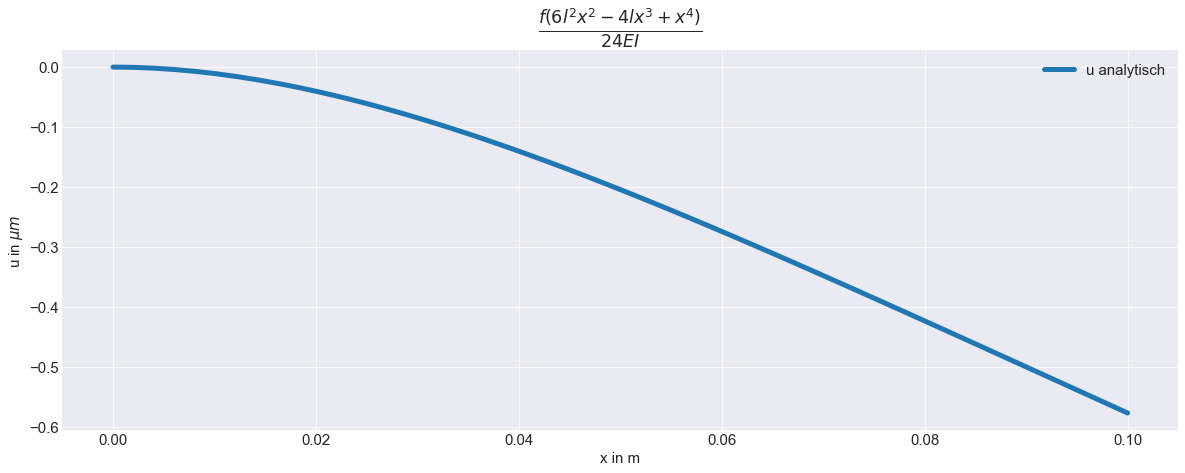

In [32]:
ax=plt.axes()
ax.tick_params(labelsize=15)
ax.plot(linie, u_(linie)*10**6, label = r'u analytisch', color=farben[0]),
ax.tick_params(labelsize=15)
ax.set_xlabel(xlabel='x in m',fontsize=15)
ax.set_ylabel(ylabel=r'u in $\mu m$ ',fontsize=15)
plt.legend(loc='best',fontsize=15)
ax.set_title(r"$%s$"%sym.latex(u), fontsize=25)

## Beide Enden eingespannt

Text(0.5, 1.0, '$\\frac{f x^{2} \\left(- l + x\\right)^{2}}{24 E I}$')

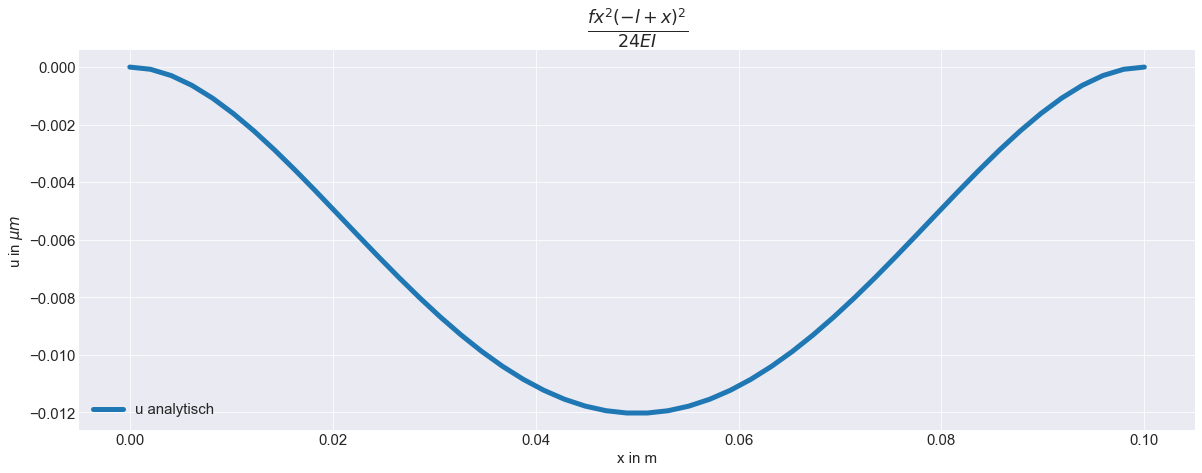

In [33]:
ax=plt.axes()
ax.tick_params(labelsize=15)
ax.plot(linie, u_e_(linie)*10**6, label = r'u analytisch', color=farben[0]),
ax.tick_params(labelsize=15)
ax.set_xlabel(xlabel='x in m',fontsize=15)
ax.set_ylabel(ylabel=r'u in $\mu m$ ',fontsize=15)
plt.legend(loc='best',fontsize=15)
ax.set_title(r"$%s$"%sym.latex(u_e), fontsize=25)